In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos 
df_messages = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_messages.csv")
df_usuarios = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_users.csv")
df_internet = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_internet.csv")
df_calls = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_calls.csv")
df_plans = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_plans.csv")

In [3]:
# Mostrar información general
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [4]:
# Mostrar información general
df_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Mostrar información general
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
# Mostrar información general
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Mostrar información general
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


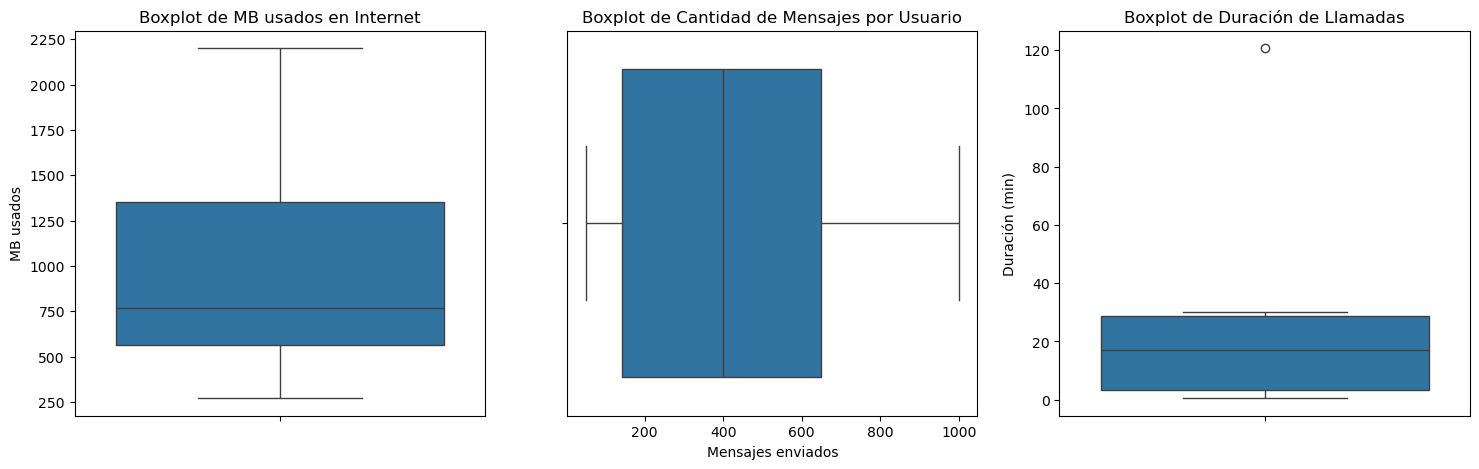


Sesgo en la distribución de cada variable:

Internet:
 - mb_used: 0.66

Mensajes:
 - messages_sent: 0.39

Llamadas:
 - duration: 1.51

Resumen de outliers detectados:
 - Internet: 0 outliers detectados
 - Mensajes: 0 outliers detectados
 - Llamadas: 1 outliers detectados


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Función para calcular el sesgo de una variable
def calculate_skewness(df, columns):
    skewness_values = {col: skew(df[col].dropna()) for col in columns}
    return skewness_values

# Función para detectar outliers con IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Cargar los datasets (simulados)
df_internet = pd.DataFrame({
    "user_id": [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007],
    "mb_used": [660.4, 270.99, 880.22, 284.68, 656.04, 1200.3, 2200.7, 1800.9]
})

df_messages = pd.DataFrame({
    "user_id": [1000, 1001, 1002, 1003, 1004, 1005],
    "messages_sent": [50, 500, 300, 700, 90, 1000]
})

df_calls = pd.DataFrame({
    "user_id": [1000, 1001, 1002, 1003, 1004, 1005],
    "duration": [8.52, 25.3, 30.1, 1.5, 0.5, 120.7]
})

# Calcular el sesgo de cada variable
skewness_results = {
    "Internet": calculate_skewness(df_internet, ["mb_used"]),
    "Mensajes": calculate_skewness(df_messages, ["messages_sent"]),
    "Llamadas": calculate_skewness(df_calls, ["duration"])
}

# Detectar Outliers con IQR en cada dataset
outliers_summary = {
    "Internet": len(detect_outliers_iqr(df_internet, "mb_used")),
    "Mensajes": len(detect_outliers_iqr(df_messages, "messages_sent")),
    "Llamadas": len(detect_outliers_iqr(df_calls, "duration")),
}

# Visualización de Outliers con Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot MB usados
sns.boxplot(y=df_internet["mb_used"], ax=axes[0])
axes[0].set_title("Boxplot de MB usados en Internet")
axes[0].set_ylabel("MB usados")

# Boxplot Mensajes enviados
sns.boxplot(x=df_messages["messages_sent"], ax=axes[1])
axes[1].set_title("Boxplot de Cantidad de Mensajes por Usuario")
axes[1].set_xlabel("Mensajes enviados")

# Boxplot Duración de llamadas
sns.boxplot(y=df_calls["duration"], ax=axes[2])
axes[2].set_title("Boxplot de Duración de Llamadas")
axes[2].set_ylabel("Duración (min)")

plt.show()

# Mostrar resultados de sesgo y outliers
print("\nSesgo en la distribución de cada variable:")
for category, values in skewness_results.items():
    print(f"\n{category}:")
    for col, skew_value in values.items():
        print(f" - {col}: {skew_value:.2f}")

print("\nResumen de outliers detectados:")
for category, count in outliers_summary.items():
    print(f" - {category}: {count} outliers detectados")
